# gb_mcmc run dir analysis

Goal is to be able to point this at a run-dir laid out as gbmcmc does, and to generage graphs showing what the MCMC is actually doing.

In [112]:
import numpy as np
import matplotlib.pyplot as plt

rundir = '/home/mtauraso/src/ldasoft/rundir9'

# model_chain.dat 

In [70]:


verbose = False


# Number zero here is the parallel annealing temperature
model_chain_file = f"{rundir}/chains/model_chain.dat.0"

# See print_chain_state  (GalacticBinaryIO.c)
model_chain_dtype = [('step', 'int'), # mcmc step
                     ('Nlive', 'int'), # Number of sources modeled
                     ('logL', 'double'),
                     ('logLnorm', 'double'),
                     ('t0', 'double'), # Start time, for more than one time segment there will be however many time segments were specified
                                       # Only works for one time segment
                     ]

# Only works for one source for more than one source we need dimension chain, or variable parsing per line
if verbose:
    # from print_source parameters
    model_chain_dtype += [('f0', 'double'), # Principle frequency
                          ('dfdt', 'double'), # Rate of frequency change
                          ('amp', 'double'), # Amplitude
                          ('phi', 'double'), # Sky location phi (ecliptic)
                          ('costheta', 'double'), # Sky location costheta (ecliptic)
                          ('cosi', 'double'), # Cos of inclination angle
                          ('psi', 'double'), # Polarization angle
                          ('phi0', 'double'),] # Orbit position/starting phase?

model_chain = np.loadtxt(model_chain_file, dtype=model_chain_dtype, usecols=np.arange(0,len(model_chain_dtype)))

# open all the dat files?
# Read in each one with some column references for what they are
# Paste in the descriptions from the docs for each one

# Figure out how to graph things by iteration number


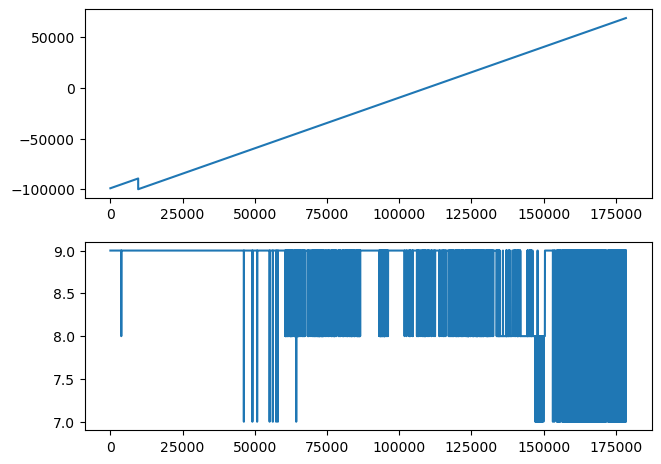

In [72]:


fig, (ax1, ax2) = plt.subplots(2,1)
plt.tight_layout()

x = np.arange(0, len(model_chain['step'][10000:]))
y = model_chain['step'][10000:]
z = model_chain['Nlive'][10000:]


ax1.plot(x,y)
ax2.plot(x,z)

In [ ]:
# Looking at sangria data file and pulling out sources
# Decided it was faster to just do this in the ldc-data notebook since already set up
#import ldc.io.hdf5 as hdfio

#DATAPATH = "/home/mtauraso/src/LDC-data"
#sangria_fn = DATAPATH+"/LDC2_sangria_training_v2.h5"

# Frequency grid examination

In [8]:
frequency_grid = np.loadtxt("/home/mtauraso/src/ldasoft/globalfit/data/ucb_frequency_spacing.dat", 
           dtype=[('id', 'int'),('n', 'int'),('fstart', 'double'),('fstop','double')])

frequency_grid["fstart"][400:500]




array([0.00720104, 0.00721732, 0.00723359, 0.00724987, 0.00726615,
       0.00728242, 0.0072987 , 0.00731497, 0.00733125, 0.00734753,
       0.0073638 , 0.00738008, 0.00739635, 0.00741263, 0.00742891,
       0.00744518, 0.00746146, 0.00747773, 0.00749401, 0.00751029,
       0.00752656, 0.00754284, 0.00755911, 0.00757539, 0.00759167,
       0.00760794, 0.00762422, 0.00764049, 0.00765677, 0.00767305,
       0.00768932, 0.0077056 , 0.00772187, 0.00773815, 0.00775443,
       0.0077707 , 0.00778698, 0.00780326, 0.00781953, 0.00783581,
       0.00785208, 0.00786836, 0.00788464, 0.00790091, 0.00791719,
       0.00793346, 0.00794974, 0.00796602, 0.00798229, 0.00799857,
       0.00801484, 0.00803112, 0.0080474 , 0.00807995, 0.0081125 ,
       0.00814505, 0.0081776 , 0.00821016, 0.00824271, 0.00827526,
       0.00830781, 0.00834036, 0.00837292, 0.00840547, 0.00843802,
       0.00847057, 0.00850313, 0.00853568, 0.00856823, 0.00860078,
       0.00863333, 0.00866589, 0.00869844, 0.00873099, 0.00876

# Dimension chain.dat

In [113]:


dimension_schema = [
    ('f0', 'double'), # Principle frequency
    ('dfdt', 'double'), # Rate of frequency change
    ('amp', 'double'), # Amplitude
    ('phi', 'double'), # Sky location phi (ecliptic)
    ('costheta', 'double'), # Sky location costheta (ecliptic)
    ('cosi', 'double'), # Cos of inclination angle
    ('psi', 'double'), # Polarization angle
    ('phi0', 'double'),] # Orbit position/starting phase?



# TODO: Find lowest number dimension chain file that exists so we don't have to set stride
dimension_file_stride = 7
dimension_file = rundir + f'/chains/dimension_chain.dat.{dimension_file_stride}'

dimension_table = np.loadtxt(dimension_file, dtype=dimension_schema)



(array([[1.040e+02, 8.760e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         2.600e+01, 0.000e+00, 0.000e+00, 0.000e+00],
        [1.293e+03, 6.441e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00],
        [7.373e+03, 8.448e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 2.430e+02],
        [6.331e+03, 6.273e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 8.410e+02],
        [1.385e+03, 6.500e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.221e+03],
        [1.530e+02, 4.229e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 4.860e+02],
        [1.600e+01, 1.106e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 2.610e+02],
        [0.000e+00, 1.420e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

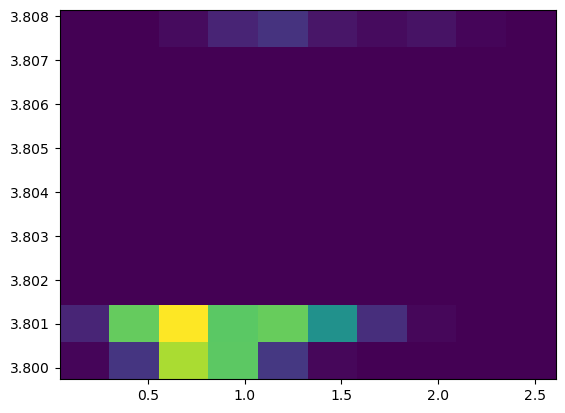

In [114]:
# This is a way to look at roughly continguous samples of a given  source
# For now source_number=0 is the first source
source_index = 1

# Pick out only our source
parameter_table = dimension_table[source_index::dimension_file_stride]

plt.hist2d(parameter_table['amp']*1e22, parameter_table['f0']*1000)

#plt.hist(parameter_table['f0']*1000, bins=30)

# Frequency range calculation

In [5]:
from astropy import units as u

# A line from ucb_frequency_spacing.dat in 7 mHz range
#397 128 0.00715221354167 0.00716848958333



freq_min = 0.00715221354167 * u.Hz
freq_max = 0.00716848958333 * u.Hz
#duration = 1.5/12 * u.yr
#duration = 3932160 * u.s # 1.5 mo
duration = 7864320 * u.s # 3 mo
#duration = 15728640 * u.s # 6 mo
#duration = 31535995*u.s # 1 year


freq_bandwidth = freq_max-freq_min
samples = duration*freq_bandwidth

print(f"--fmin={freq_min.value} --samples={int(samples.to(u.dimensionless_unscaled).value)} --duration={int(duration.to(u.s).value)} \\")


--fmin=0.00715221354167 --samples=127 --duration=7864320 \


In [9]:
(6.67e-8 * 8 * 3.14159)/300

5.587841413333333e-09